# Analyze Images using MS Azure AI vision library

## Global imports

In [2]:
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential
import os

## Analyze an image

In [57]:
MS_AIV_ENDPOINT =os.environ['VISION_ENDPOINT']
MS_AIV_KEY = os.environ['VISION_KEY']

IMAGE_URL = 'https://www.badmintonzadar.com/wp-content/uploads/2023/04/mail_photo.jpg'



In [68]:
client = ImageAnalysisClient(endpoint= MS_AIV_ENDPOINT,credential=AzureKeyCredential( MS_AIV_KEY))

result = client.analyze_from_url(image_url= IMAGE_URL,
                        visual_features=[VisualFeatures.CAPTION,VisualFeatures.DENSE_CAPTIONS, VisualFeatures.TAGS],
                        language='en')

In [69]:
result.as_dict()

{'modelVersion': '2023-10-01', 'captionResult': {'text': 'a group of people posing for a photo', 'confidence': 0.9223527312278748}, 'denseCaptionsResult': {'values': [{'text': 'a group of people posing for a photo', 'confidence': 0.9223527312278748, 'boundingBox': {'x': 0, 'y': 0, 'w': 1920, 'h': 1280}}, {'text': 'a group of people posing for a photo', 'confidence': 0.9399266242980957, 'boundingBox': {'x': 0, 'y': 95, 'w': 1904, 'h': 1012}}, {'text': 'a person holding a bat', 'confidence': 0.7161659002304077, 'boundingBox': {'x': 485, 'y': 490, 'w': 185, 'h': 441}}, {'text': 'a person sitting with a racket', 'confidence': 0.6972630620002747, 'boundingBox': {'x': 143, 'y': 528, 'w': 190, 'h': 394}}, {'text': 'a man holding a racket', 'confidence': 0.8429195880889893, 'boundingBox': {'x': 1605, 'y': 194, 'w': 224, 'h': 719}}, {'text': 'a person holding a tennis racket', 'confidence': 0.85856032371521, 'boundingBox': {'x': 1174, 'y': 504, 'w': 182, 'h': 422}}, {'text': 'a man wearing a wh

In [18]:
result.tags.as_dict()

{'values': [{'name': 'clothing', 'confidence': 0.9994502067565918},
  {'name': 'person', 'confidence': 0.9985743761062622},
  {'name': 'footwear', 'confidence': 0.9944717884063721},
  {'name': 'jeans', 'confidence': 0.9768164753913879},
  {'name': 'people', 'confidence': 0.9652160406112671},
  {'name': 'indoor', 'confidence': 0.9604812264442444},
  {'name': 'wall', 'confidence': 0.9468201398849487},
  {'name': 'woman', 'confidence': 0.9382009506225586},
  {'name': 'floor', 'confidence': 0.9315323829650879},
  {'name': 'man', 'confidence': 0.9229677319526672},
  {'name': 'group', 'confidence': 0.9213508367538452},
  {'name': 'playing', 'confidence': 0.9088970422744751},
  {'name': 'game', 'confidence': 0.8784395456314087},
  {'name': 'social group', 'confidence': 0.8572412133216858},
  {'name': 'dance', 'confidence': 0.8450684547424316},
  {'name': 'youth', 'confidence': 0.8410342931747437},
  {'name': 'table', 'confidence': 0.840072512626648},
  {'name': 'standing', 'confidence': 0.775

In [19]:
result.dense_captions.as_dict()

{'values': [{'text': 'a group of people standing in a room',
   'confidence': 0.8826756477355957,
   'boundingBox': {'x': 0, 'y': 0, 'w': 768, 'h': 576}},
  {'text': 'a woman standing in a room',
   'confidence': 0.7506163120269775,
   'boundingBox': {'x': 286, 'y': 230, 'w': 168, 'h': 345}},
  {'text': 'a man in a red jacket',
   'confidence': 0.8268629908561707,
   'boundingBox': {'x': 114, 'y': 199, 'w': 114, 'h': 337}},
  {'text': 'a person standing in a room',
   'confidence': 0.7628918290138245,
   'boundingBox': {'x': 396, 'y': 255, 'w': 147, 'h': 313}},
  {'text': 'a person wearing a blue sweater with gingerbread men on it',
   'confidence': 0.7554178237915039,
   'boundingBox': {'x': 630, 'y': 223, 'w': 117, 'h': 346}},
  {'text': 'a black chair with a black seat',
   'confidence': 0.7161139249801636,
   'boundingBox': {'x': 1, 'y': 308, 'w': 73, 'h': 78}},
  {'text': 'a man and woman standing in a room',
   'confidence': 0.7463229298591614,
   'boundingBox': {'x': 46, 'y': 18

## Detect and locate people in an image

In [61]:
result = client.analyze_from_url(image_url= IMAGE_URL,
                                 visual_features=[VisualFeatures.PEOPLE])

In [30]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import requests
from io import BytesIO


People in image:
  Results saved in people.jpg


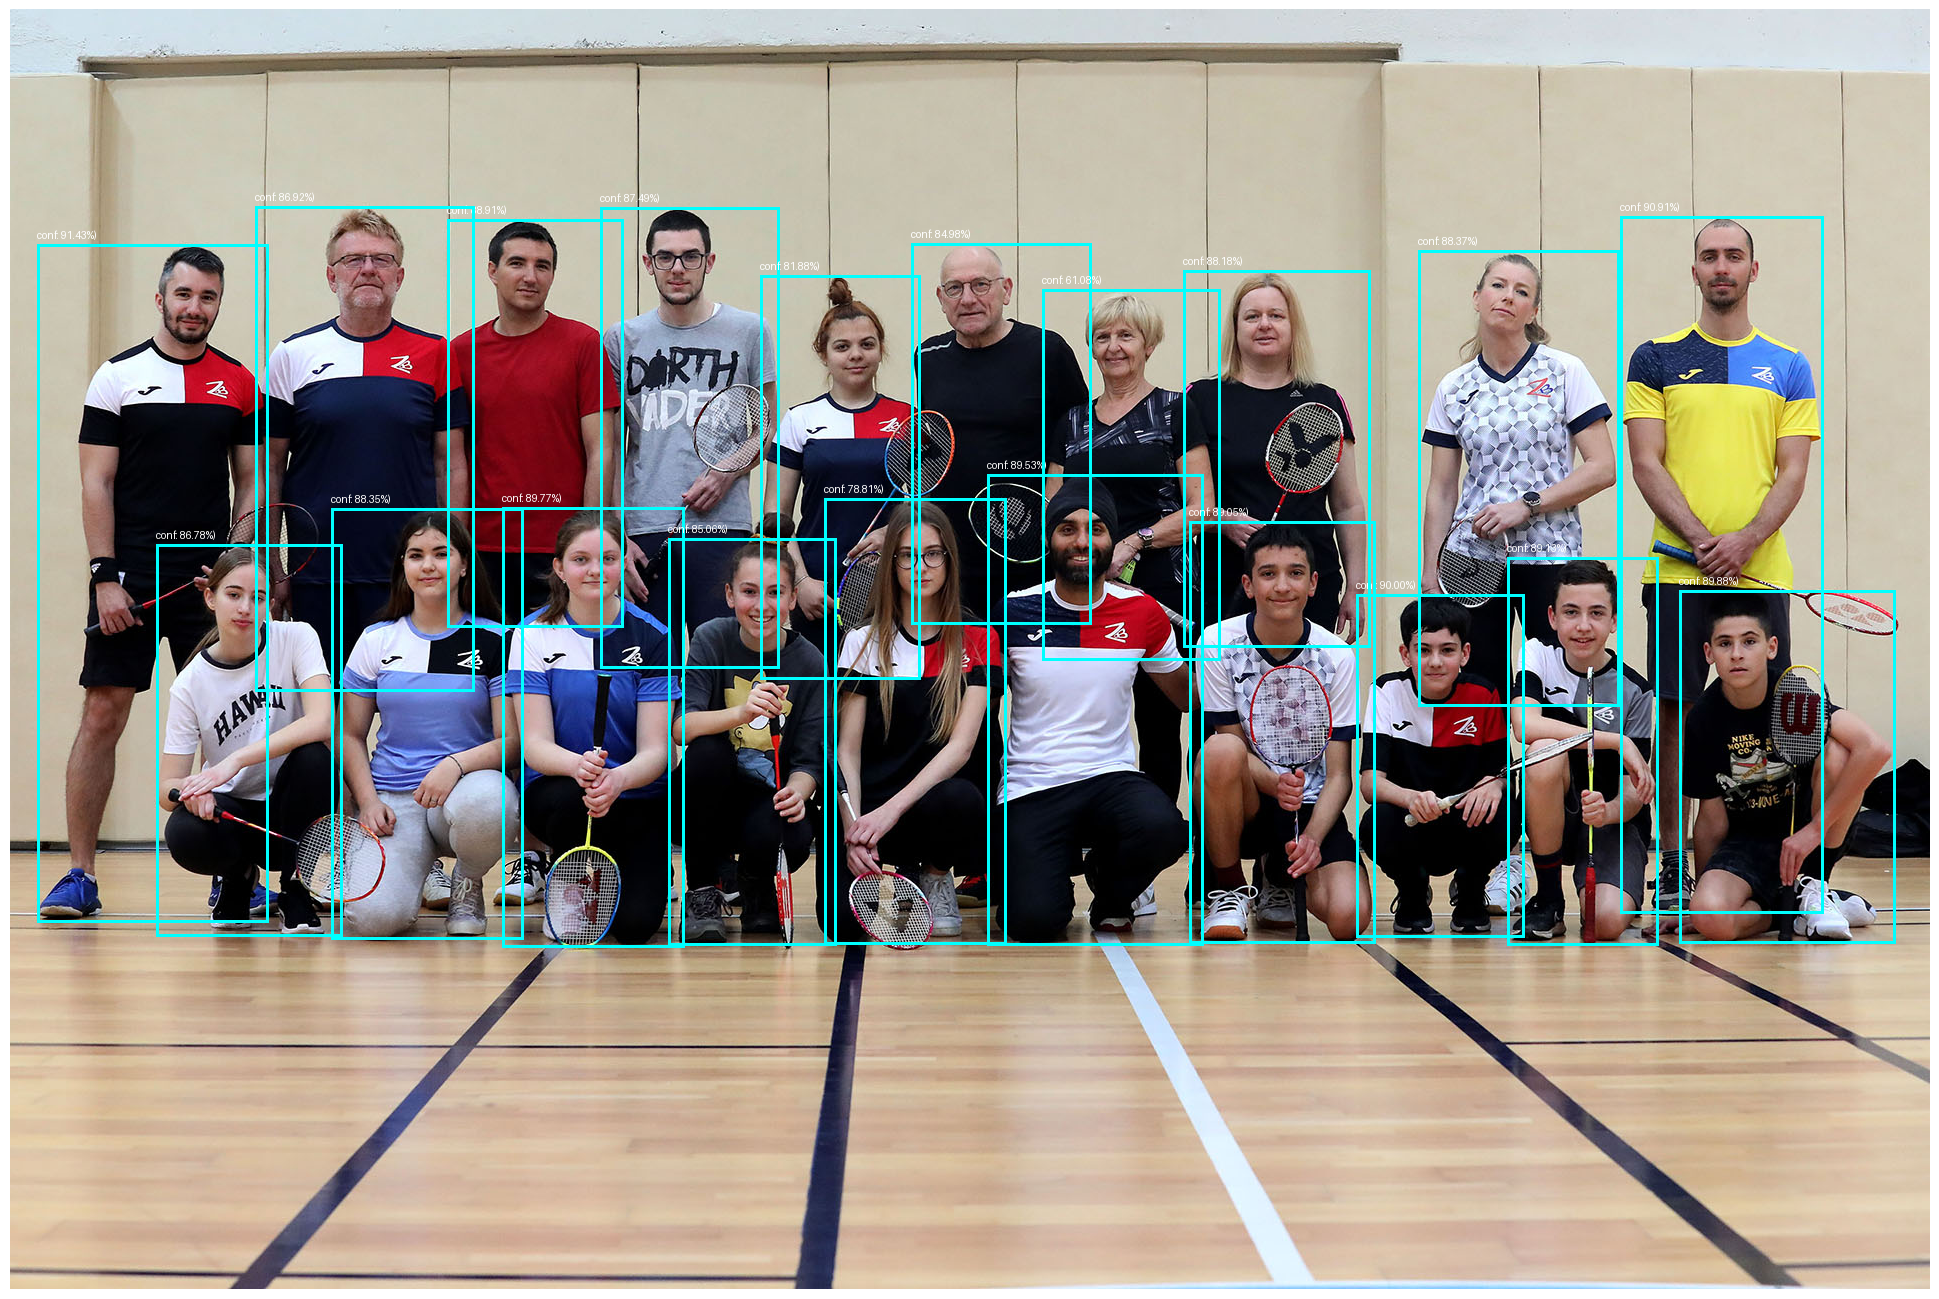

In [63]:
image_data = requests.get(IMAGE_URL).content

text_margin = 15

conf_color = 'white'
# Get people in the image
if result.people is not None:
    print("\nPeople in image:")

    # Prepare image for drawing
    image = Image.open(BytesIO(image_data))
    fig = plt.figure(figsize=(image.width/100, image.height/100))
    plt.axis('off')
    draw = ImageDraw.Draw(image)
    color = 'cyan'

    for detected_people in result.people.list:
        if detected_people.confidence > 0.5:
            # Draw object bounding box
            r = detected_people.bounding_box
            bounding_box = ((r.x, r.y), (r.x + r.width, r.y + r.height))
            draw.rectangle(bounding_box, outline=color, width=3)
            draw.text((r.x, r.y-text_margin), f"conf: {detected_people.confidence * 100:.2f}%)", fill=conf_color)
            # Return the confidence of the person detected
            #print(" {} (confidence: {:.2f}%)".format(detected_people.bounding_box, detected_people.confidence * 100))
        
    # Save annotated image
    plt.imshow(image)
    plt.tight_layout(pad=0)
    outputfile = 'people.jpg'
    fig.savefig(outputfile)
    print('  Results saved in', outputfile)

In [59]:
result.people.as_dict()

{'values': [{'boundingBox': {'x': 467, 'y': 234, 'w': 174, 'h': 339},
   'confidence': 0.928788959980011},
  {'boundingBox': {'x': 109, 'y': 221, 'w': 117, 'h': 353},
   'confidence': 0.9207614660263062},
  {'boundingBox': {'x': 369, 'y': 239, 'w': 87, 'h': 320},
   'confidence': 0.9065807461738586},
  {'boundingBox': {'x': 449, 'y': 258, 'w': 92, 'h': 295},
   'confidence': 0.8989176154136658},
  {'boundingBox': {'x': 667, 'y': 240, 'w': 43, 'h': 134},
   'confidence': 0.8976278305053711},
  {'boundingBox': {'x': 607, 'y': 237, 'w': 53, 'h': 134},
   'confidence': 0.8627598285675049},
  {'boundingBox': {'x': 213, 'y': 229, 'w': 93, 'h': 341},
   'confidence': 0.7033541202545166},
  {'boundingBox': {'x': 521, 'y': 241, 'w': 34, 'h': 53},
   'confidence': 0.5365296006202698},
  {'boundingBox': {'x': 220, 'y': 226, 'w': 228, 'h': 334},
   'confidence': 0.14873652160167694},
  {'boundingBox': {'x': 518, 'y': 241, 'w': 33, 'h': 128},
   'confidence': 0.03830837458372116},
  {'boundingBox':

## Remove the background or generate a foreground matte of an image

In [64]:
API_VERSION = '2023-02-01-preview'
MODE = "backgroundRemoval"; # Can be "foregroundMatting" or "backgroundRemoval"


url = "{}computervision/imageanalysis:segment?api-version={}&mode={}".format(MS_AIV_ENDPOINT, API_VERSION, MODE)

headers= {
    "Ocp-Apim-Subscription-Key": MS_AIV_KEY, 
    "Content-Type": "application/json" 
}

body = {
    "url" : IMAGE_URL
}


In [65]:
response = requests.post(url, headers=headers, json=body)
image = response.content

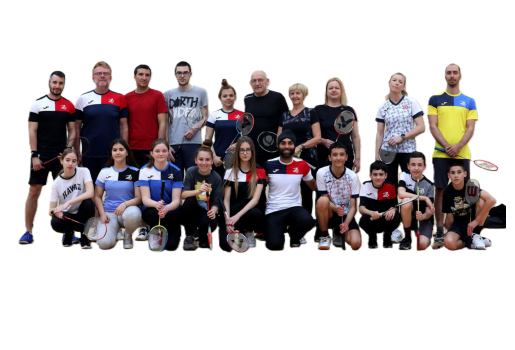

In [66]:
plt.axis('off')
plt.imshow(Image.open(BytesIO(image)))

In [67]:
with open("out_picture.png", "wb") as f:
    f.write(image)

